In [4]:
def getList(dict): 
    return dict.keys() 

from chessdotcom import get_leaderboards

data = get_leaderboards()
# getList(data.json) # in case another type is needed
top_50_rapid_playes = [x["username"] for x in data.json["live_rapid"]]

In [5]:
print(top_50_rapid_playes)

['ChessBrah', 'SeanWinshand', 'GMSrinath', 'lachesisQ', 'dretch', 'LyonBeast', 'penguingm1', 'Sibelephant', 'Aravindhchess1999', 'BogdanDeac', 'Yaacovn', 'Chefshouse', 'barzed', 'MagnusCarlsen', 'HuntressesofArtemis', 'ChristopherYoo', 'Hikaru', 'Elshan1985', 'GigaQuparadze', 'AnishGiri', 'MiroVlasenko', 'Grischuk', 'Last7Samurai', 'RoelandPruijssers', 'AlexanderL', 'TenisMaster', 'GutovAndrey', 'praveenb2002', 'cruise999', 'Atalik', 'Malev212', 'LOVEVAE', 'SpeedofLight0', 'ChessLover0108', 'Zkid', 'bangchess21', 'kleinebeer98', 'kaumandur01', 'jefferyx', 'BeanScreen', 'howitzer14', 'PaulVelten', 'GOGIEFF', 'chesspanda123', 'Y0ung_Capablanca', 'Sanan_Sjugirov', 'Twitch_ElhamBlitz05', 'KNVB', 'Bladel', 'attack2mateU']


In [13]:
from chessdotcom import get_player_games_by_month

data = get_player_games_by_month("Last7Samurai", month=1, year=2021)
print(data.json)

{'games': [{'url': 'https://www.chess.com/game/daily/286999128', 'pgn': '[Event "Let\'s Play!"]\n[Site "Chess.com"]\n[Date "2020.11.14"]\n[Round "-"]\n[White "Last7Samurai"]\n[Black "jrod44thatcher"]\n[Result "1-0"]\n[CurrentPosition "8/pB5p/5kp1/6p1/8/P3P1P1/1P1R1P1P/6K1 b - - 0 32"]\n[Timezone "UTC"]\n[ECO "A17"]\n[ECOUrl "https://www.chess.com/openings/English-Opening-Anglo-Indian-Hedgehog-System-3.Nf3"]\n[UTCDate "2020.11.14"]\n[UTCTime "15:42:37"]\n[WhiteElo "2207"]\n[BlackElo "1603"]\n[TimeControl "1/259200"]\n[Termination "Last7Samurai won by resignation"]\n[StartTime "15:42:37"]\n[EndDate "2021.01.04"]\n[EndTime "04:47:30"]\n[Link "https://www.chess.com/game/daily/286999128"]\n\n1. c4 {[%clk 71:59:57]} 1... e6 {[%clk 68:30:47]} 2. Nf3 {[%clk 71:26:08]} 2... Nf6 {[%clk 71:27:27]} 3. Nc3 {[%clk 71:05:04]} 3... c5 {[%clk 63:44:41]} 4. g3 {[%clk 61:55:21]} 4... Nc6 {[%clk 24:50:26]} 5. Bg2 {[%clk 61:35:14]} 5... d5 {[%clk 71:59:47]} 6. cxd5 {[%clk 71:59:28]} 6... exd5 {[%clk 51:29:

In [100]:
import json

only_600 = filter(lambda x:x["time_control"]=="600",data.json["games"])
len(list(only_600))

3

In [101]:
from collections import Counter

# what does he play?
def get_frequency_of_played_formats(data):
    games = data.json["games"]
    list_of_types = [x["time_control"] for x in games]
    return Counter(list_of_types)

get_frequency_of_played_formats(data)

Counter({'1/259200': 1, '1500+5': 9, '180': 11, '1/1209600': 1, '600': 3})

In [94]:
def get_frequencies_for_players(players):
    player_frequency = {}
    for player in players:
        data = get_player_games_by_month(player, month=1, year=2021)
        frequencies = get_frequency_of_played_formats(data)
        player_frequency[player] = frequencies
    return player_frequency
    
player_frequency = get_frequencies_for_players(top_50_rapid_playes)

In [105]:
from functools import reduce

top_50_counter = reduce((lambda x, y: x + y), player_frequency.values())

In [106]:
top_50_counter = dict(filter(lambda x: x[1]>15 and x[1]<800 and not x[0].startswith("1/"),top_50_counter.items()))
top_50_counter = dict(sorted(top_50_counter.items(), key=lambda item: item[1]))

In [107]:
top_50_counter

{'3600+5': 25,
 '900+10': 26,
 '10': 33,
 '600': 53,
 '1500+5': 62,
 '120+1': 65,
 '300': 104,
 '180+2': 210,
 '180+1': 398}

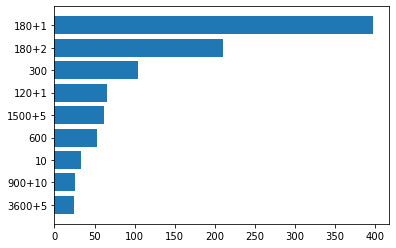

In [108]:
# top formats of top player
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = list(top_50_counter.keys())
frequency = list(top_50_counter.values())

fig, ax = plt.subplots()
ax.barh(x, frequency, align='center')
plt.show()

In [114]:
import re

def get_number_of_moves(data, time_control="300"):
    total_move_numbers = []
    games = data.json["games"]
    for x in games:
        if "pgn" not in x or x["time_control"] != "300":
            continue
        last_move_stamp = re.findall("\d+..[a-zA-Z]", x["pgn"])[-1]
        last_move_number = int(re.search('[0-9]+', last_move_stamp).group())
        total_move_numbers.append(last_move_number)    
    return total_move_numbers

In [115]:
def get_moves_counters_for_players(players, time_control="300"):
    player_moves_count = {}
    for player in players:
        data = get_player_games_by_month(player, month=1, year=2021)
        move_counters_array = get_number_of_moves(data, time_control)
        player_moves_count[player] = move_counters_array
    return player_moves_count

player_moves_count = get_moves_counters_for_players(top_50_rapid_playes)

In [116]:
player_moves_count

{'ChessBrah': [],
 'SeanWinshand': [91, 8, 8],
 'GMSrinath': [],
 'lachesisQ': [],
 'dretch': [],
 'LyonBeast': [],
 'penguingm1': [],
 'Sibelephant': [],
 'Aravindhchess1999': [],
 'BogdanDeac': [],
 'Yaacovn': [],
 'Chefshouse': [],
 'barzed': [],
 'MagnusCarlsen': [],
 'HuntressesofArtemis': [],
 'ChristopherYoo': [12, 20, 17, 34, 14, 25],
 'Hikaru': [],
 'Elshan1985': [],
 'GigaQuparadze': [],
 'AnishGiri': [],
 'MiroVlasenko': [],
 'Grischuk': [],
 'Last7Samurai': [],
 'RoelandPruijssers': [],
 'AlexanderL': [],
 'TenisMaster': [],
 'GutovAndrey': [],
 'praveenb2002': [],
 'cruise999': [],
 'Atalik': [],
 'Malev212': [],
 'LOVEVAE': [],
 'SpeedofLight0': [],
 'ChessLover0108': [],
 'Zkid': [],
 'bangchess21': [53],
 'kleinebeer98': [],
 'kaumandur01': [],
 'jefferyx': [],
 'BeanScreen': [],
 'howitzer14': [],
 'PaulVelten': [],
 'GOGIEFF': [],
 'chesspanda123': [],
 'Y0ung_Capablanca': [],
 'Sanan_Sjugirov': [],
 'Twitch_ElhamBlitz05': [27, 42, 60],
 'KNVB': [16,
  22,
  23,
  25,

In [140]:
import numpy as np

def filter_players(player_moves_count, played_games = 5):
    return dict(filter(lambda x: len(x[1])>played_games, player_moves_count.items()))

def get_number_of_games_with_moves_number(player_moves_count, step=10, until=60):
    moves_graduation = np.arange(start = 0, stop = until + step, step = step)
    moves_graduation_counter = dict.fromkeys(moves_graduation, 0)
    for move_counters in player_moves_count.values():
        for move_count in move_counters:
            if (move_count > until):
                    moves_graduation_counter[until] = moves_graduation_counter[until] + 1;
                    continue
            move_count -= move_count % 10;
            moves_graduation_counter[move_count] = moves_graduation_counter[move_count] + 1;
    return moves_graduation_counter

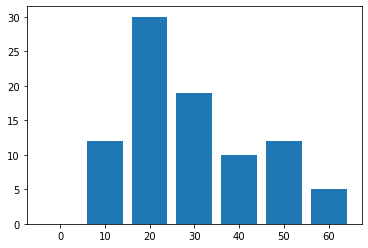

In [143]:
# moves number in a game 
import numpy as np
import matplotlib.pyplot as plt

# get data
dict_moves_count = get_number_of_games_with_moves_number(filter_players(player_moves_count))

height = dict_moves_count.values()
bars = dict_moves_count.keys()

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()